# Classification

## Machine Learning with scikit-learn

In [1]:
path = r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\telecom_churn_clean.csv'

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
churn_df = pd.read_csv(path)
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values #.values exports the data as Numpy Array
y = churn_df['churn'].values

In [9]:
print(X.shape, y.shape)

(3333, 2) (3333,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [11]:
X_new = np.array(
  [ [56.8, 17.5]
   ,[24.4, 24.1]
   ,[50.1, 10.9]]
)
print(X_new.shape)

(3, 2)


In [12]:
predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

Predictions: [1 0 0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [14]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

Predictions: [0 1 0]


In [15]:
def upper_everything(elements: list[str]) -> list[str]:
  return [element.upper() for element in elements]

In [16]:
lst = ['apple', 'banana', 'kiwi']
upper_everything(lst)

['APPLE', 'BANANA', 'KIWI']

In [17]:
sample: list[int] = ['a', 1, 'b', 2]

## Measuring Model Performance

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\1270816\AppData\Local\Temp\ipykernel_21056\554600982.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\telecom_churn_clean.csv'

In [4]:
churn_df = pd.read_csv(path)
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8545727136431784


In [6]:
# Finding Accuracies
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors,'\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


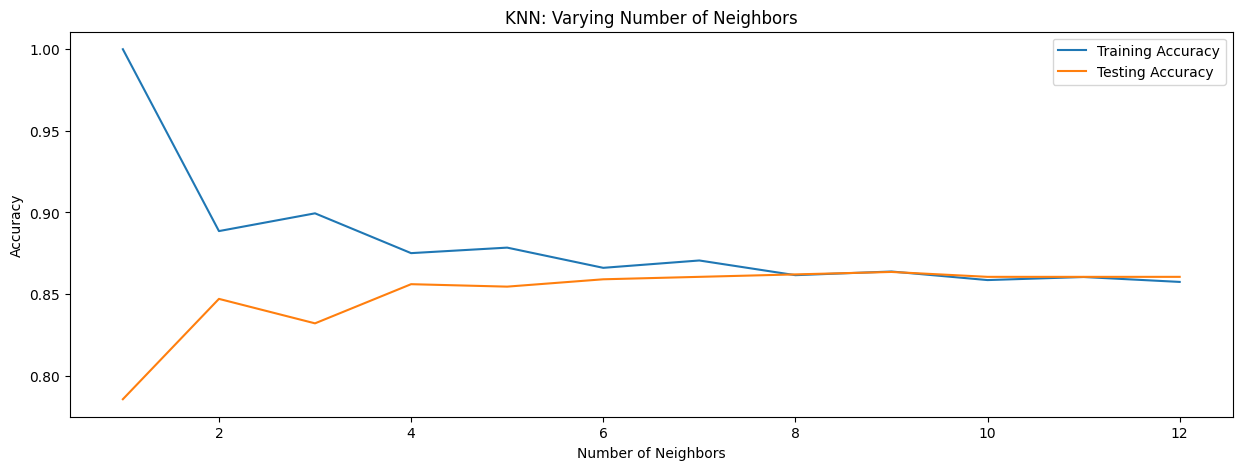

In [14]:
#Plotting accuracies
plt.figure(figsize=(15,5))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(train_accuracies.keys(), train_accuracies.values(), label='Training Accuracy')
plt.plot(test_accuracies.keys(), test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
path = r'..\Datasets\diabetes_clean.csv'
diabetes_df = pd.read_csv(path)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768, 8) (768,)


In [28]:
X_bmi = diabetes_df.loc[:, 'bmi'].values
# X_bmi = X[:, 3]
print(type(X_bmi))

<class 'numpy.ndarray'>


In [27]:
X_bmi = X[:, 3]
print(type(X_bmi))

<class 'numpy.ndarray'>


In [30]:
print(y.shape, X_bmi.shape)

(768,) (768,)


In [35]:
# We need to convery it into a two dimensional array to be accepted by scikit
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


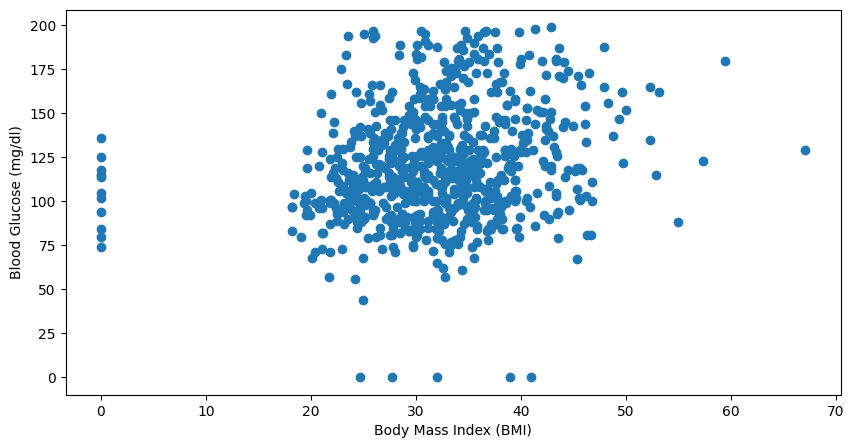

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(X_bmi, y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index (BMI)')
plt.show();

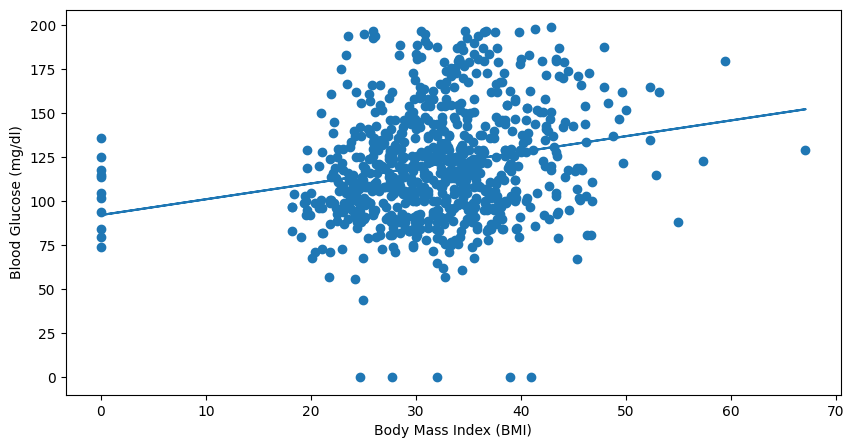

In [41]:
lr = LinearRegression()
lr.fit(X_bmi, y)
predictions = lr.predict(X_bmi)
plt.figure(figsize=(10,5))
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index (BMI)')
plt.show();

In [43]:
# =acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371
sales_df = pd.read_csv(r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\advertising_and_sales_clean.csv')
print(sales_df)

           tv     radio  social_media influencer      sales
0     16000.0   6566.23       2907.98       Mega   54732.76
1     13000.0   9237.76       2409.57       Mega   46677.90
2     41000.0  15886.45       2913.41       Mega  150177.83
3     83000.0  30020.03       6922.30       Mega  298246.34
4     15000.0   8437.41       1406.00      Micro   56594.18
...       ...       ...           ...        ...        ...
4541  26000.0   4472.36        717.09      Micro   94685.87
4542  71000.0  20610.69       6545.57       Nano  249101.92
4543  44000.0  19800.07       5096.19      Micro  163631.46
4544  71000.0  17534.64       1940.87      Macro  253610.41
4545  42000.0  15966.69       5046.55      Micro  148202.41

[4546 rows x 5 columns]


In [44]:
X = sales_df['radio'].values
y = sales_df['sales'].values
X = X.reshape(-1, 1)
print(X.shape, y.shape)

(4546, 1) (4546,)


In [45]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


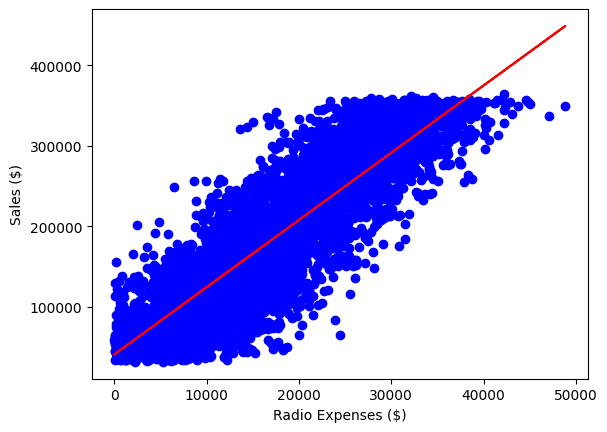

In [46]:
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.xlabel('Radio Expenses ($)')
plt.ylabel('Sales ($)')
plt.show();

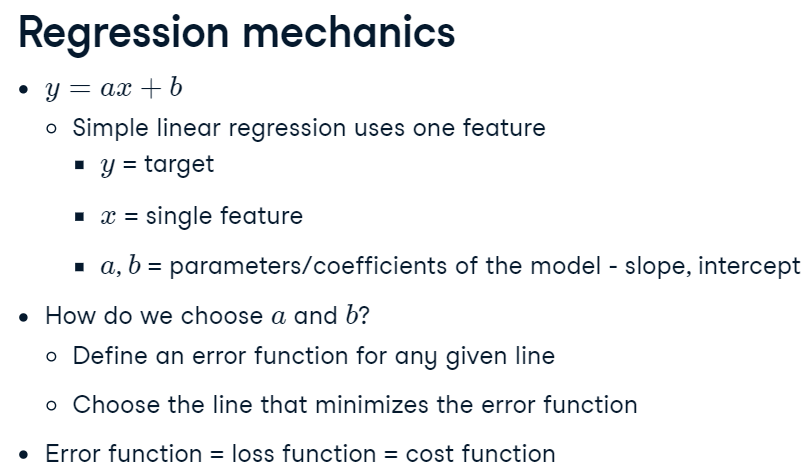

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [19]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_pred = lr_all.predict(X_test)

In [20]:
lr_all.score(X_test, y_test)

0.3543843821592033

In [23]:
import sklearn.metrics as skm #import mean_squared_error
import sklearn.linear_model as sklm
skm.mean_squared_error(y_test, y_pred, squared=False)


c:\Users\anshu\OneDrive\Code\Python\Python\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


26.723789513946738

In [22]:
skm.root_mean_squared_error(y_test, y_pred)

26.723789513946738

In [42]:
# =acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371
sales_df = pd.read_csv(r'..\Datasets\advertising_and_sales_clean.csv')
print(sales_df.shape)

sales_df.drop('influencer', axis=1, inplace=True)

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
lr = sklm.LinearRegression()
# Fit the model to the data
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

(4546, 5)
Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [49]:
for _ in range(2):
    print(f'y_test[{_}]={y_test[_]} & y_pred[{_}]={y_pred[_]} ==> {(y_pred[_]-y_test[_])/y_test[_]*100}')

y_test[0]=55261.28 & y_pred[0]=53176.66154233887 ==> -3.7722949190846227
y_test[1]=67574.9 & y_pred[1]=70996.19873235082 ==> 5.062972690082898


In [50]:
r_sq = lr.score(X_test, y_test)
rmse = skm.root_mean_squared_error(y_test, y_pred)
print(f'r^2: {r_sq}')
print(f'RMSE: {rmse}')

r^2: 0.9990152104759368
RMSE: 2944.4331996001015


In [51]:
import sklearn.model_selection as skms
kf = skms.KFold(n_splits=6, shuffle=True, random_state=5)
lr = sklm.LinearRegression()
cv_scores = skms.cross_val_score(lr, X, y, cv=kf)
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [52]:
print(f'mean of cv_scores = {np.mean(cv_scores)}')
print(f'Std_Dev of cv_scores = {np.std(cv_scores)}')
print(f'95% confidence interval of cv_scores = {np.quantile(cv_scores, [0.025, 0.975])}')

mean of cv_scores = 0.9989896443678249
Std_Dev of cv_scores = 6.608118371529651e-05
95% confidence interval of cv_scores = [0.99889767 0.99908583]


##### Ridge Regression

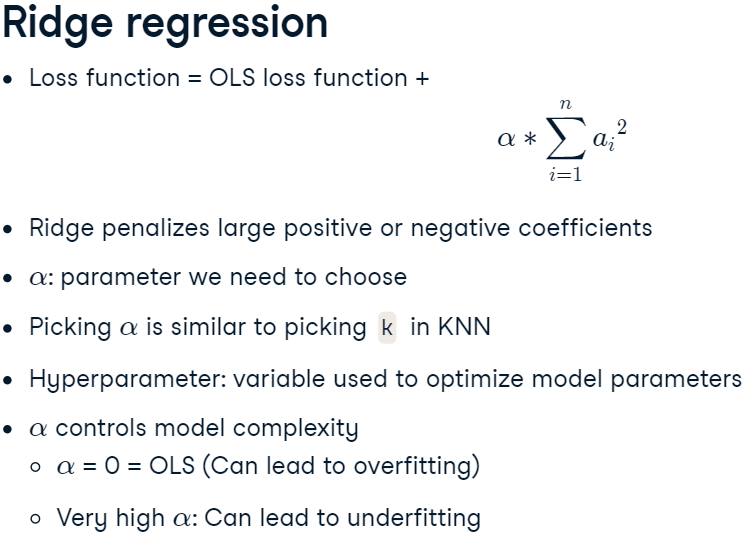

In [57]:
# X = diabetes_df.drop('glucose', axis=1).values
# y = diabetes_df['glucose'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

sales_df = pd.read_csv(r'..\Datasets\advertising_and_sales_clean.csv')
print(sales_df.shape)
sales_df.drop('influencer', axis=1, inplace=True)
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

scores= []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = sklm.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

(4546, 5)
[0.9989693601946971, 0.9989693601946972, 0.9989693601946984, 0.9989693601947103, 0.998969360194829]


##### Lasso Regression

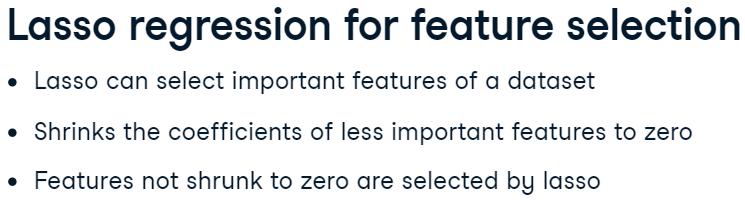

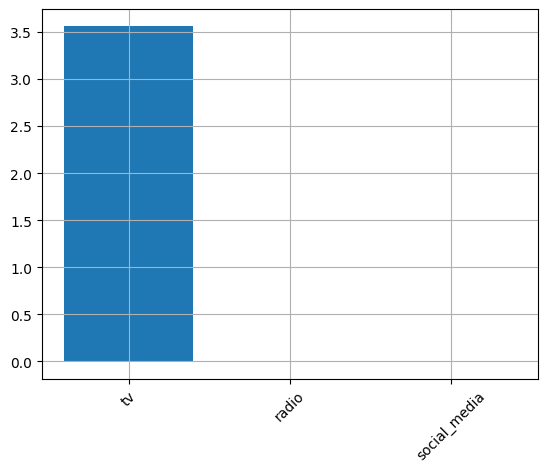

In [60]:
# names = diabetes_df.drop('glucose', axis=1).columns
names = sales_df.drop('sales', axis=1).columns
lasso = sklm.Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.grid()
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show();